## Asses the performance of a supervised classifiers

In [1]:
# Import the required libraries
import pandas as pd # Pandas deals with handling data. 
import numpy as np # Numpy provides a lot of FAST ways for array manipulation in python.
import matplotlib.pyplot as plt # Plotting script library
import matplotlib as mpl # Plotting
import seaborn as sns # More plotting

%matplotlib inline 
# Define some plotting params:
mpl.rcParams['figure.figsize'] = (12,6)
sns.set_style("whitegrid", {"axes.facecolor": ".99"})

#### Import data from openML - do train, valid, splitting

In [17]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

data = fetch_openml(name='adult', version=1)
X = pd.DataFrame(data=data.data, columns=data.feature_names).fillna(method='pad') 
y = data.target

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

rf = RandomForestClassifier(max_leaf_nodes=8).fit(X_train, y_train)
y_pred = rf.predict(X_valid)

print(classification_report(y_valid, y_pred, digits=4))

              precision    recall  f1-score   support

       <=50K     0.8442    0.9533    0.8954      9271
        >50K     0.7514    0.4452    0.5592      2940

    accuracy                         0.8310     12211
   macro avg     0.7978    0.6993    0.7273     12211
weighted avg     0.8219    0.8310    0.8145     12211



What are precision, recall, and F1?

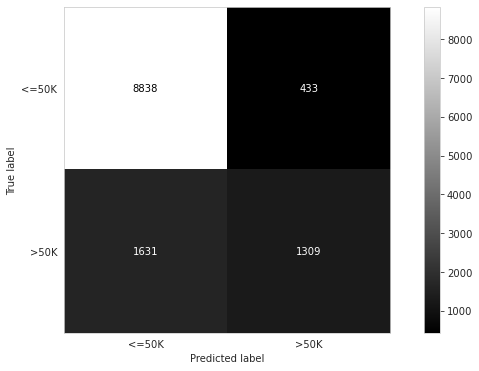

In [33]:
plot_confusion_matrix(rf, X_valid, y_valid, cmap='gray')
plt.grid(False)